## Histogram of the Outputs of the CsPbCI3QDs

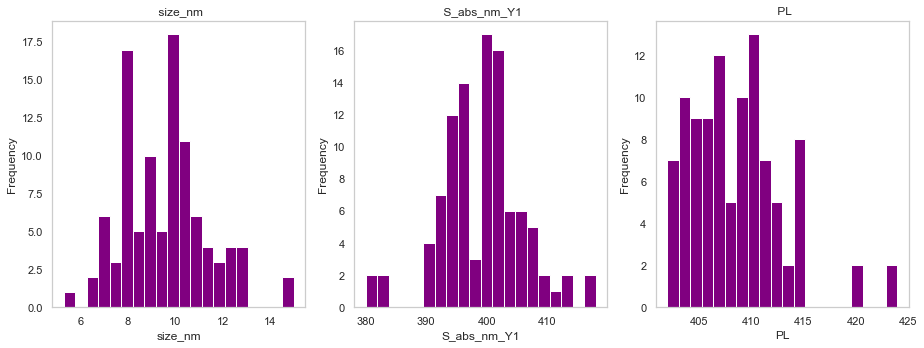

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = "/Users/mehmetsiddik/Desktop/Musa/CsPbCl3_QDs.xlsx"
df = pd.read_excel(file_path)

# List of columns for which we need to plot histograms
columns = ['size_nm', 'S_abs_nm_Y1', 'PL']
# Colors for each histogram
colors = ['red', 'blue', 'green', 'purple']

# Creating a 2x2 subplot
fig, axs = plt.subplots(1, 3, figsize=(13, 5))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plotting histograms for each column
for ax, column, color in zip(axs, columns, colors):
    ax.hist(df[column], bins=20, color='purple')
    ax.set_title(f' {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

plt.tight_layout()
plt.show()


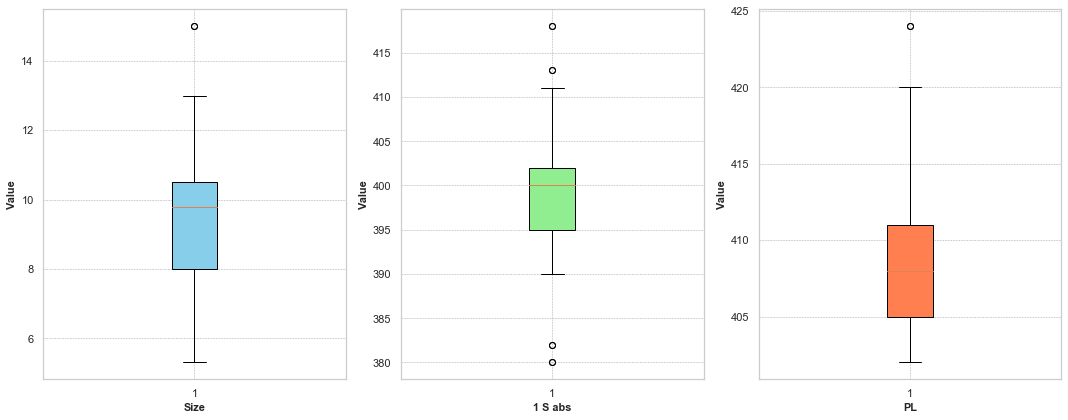

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = "/Users/mehmetsiddik/Desktop/CsPbCl3_QDs.xlsx"
df = pd.read_excel(file_path)



# Assuming you have pandas DataFrame 'df' and a list of column names 'columns'
colors = ['skyblue', 'lightgreen', 'coral']  # Example color palette
custom_labels = ['Size', '1 S abs', 'PL']  # Custom labels for x-axis

# Create a 1x3 subplot for box plots with slightly larger figure size
fig, axs = plt.subplots(1, 3, figsize=(15, 6))  # Increased figure size for readability

# Function to set bold title and labels (reusable)
def set_bold_labels(ax, column, custom_labels):
    index = columns.index(column)  # Find the index of the current column
    #ax.set_title(f'**{column}**', fontsize=12, fontweight='bold')
    ax.set_xlabel(f'{custom_labels[index]}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Value', fontsize=11, fontweight='bold')

# Plot box plots with bold labels and grid lines
for ax, column, color in zip(axs, columns, colors):
    ax.boxplot(df[column], patch_artist=True, boxprops=dict(facecolor=color))
    set_bold_labels(ax, column, custom_labels)  # Pass custom_labels to the function
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', alpha=0.7)

plt.tight_layout()
plt.show()


## Pearson Correlation Heatmap

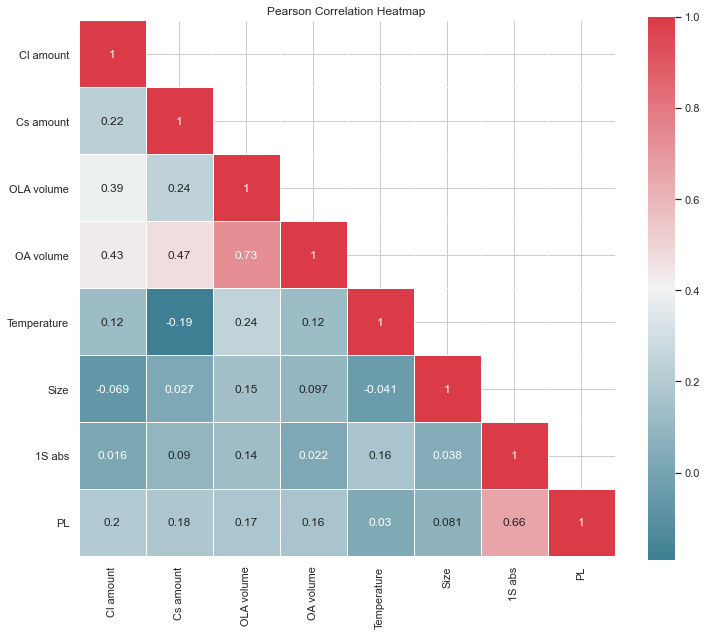

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the uploaded Excel file
file_path = '/Users/mehmetsiddik/Desktop/Musa/modified_data.xlsx'
#file_path = "/Users/mehmetsiddik/Desktop/Musa/CsPbCl3_QDs.xlsx"
df = pd.read_excel(file_path)

# Define the feature matrix and output variables
FeatureMatrix = ['Cl_mmol', 'Cs_mmol', 'Oleylamine_OLA_ml', 'Oleicacid_OA_ml', 'Temperature']
Output = ['size_nm', 'S_abs_nm_Y1', 'PL']

# Select the relevant columns from the DataFrame
df_corr = df[FeatureMatrix + Output]

# Calculate Pearson correlation
cor = df_corr.corr()

# Create a mask to highlight specific cells
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
mask[np.where(cor == 1)] = False

# Create a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Define custom labels for features and outputs
custom_labels = ['Cl amount', 'Cs amount', 'OLA volume', 'OA volume', 'Temperature', 'Size', '1S abs', 'PL']

# Create a heatmap with customized colors and masked cells
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=cmap, mask=mask, square=True, linewidths=0.5, 
            xticklabels=custom_labels, yticklabels=custom_labels)

# Rotate the y-axis labels vertically
plt.yticks(rotation=0)

# Rotate the x-axis labels horizontally
plt.xticks(rotation=90)

plt.title('Pearson Correlation Heatmap')
plt.show()


## Random Forest of CsPbCl3 Codes

In [2]:
# Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler # New add
from sklearn.compose import ColumnTransformer # New add

In [3]:
# Read the data
excel_file = "/Users/mehmetsiddik/Desktop/CsPbCl3_QDs.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

In [4]:
CsPbCl3

,Temperature,Cl_source,Cl_mmol,Cl_concentration_mmol_ml,Pb_source,Pb_mmol,Pb_concentration_mmol_ml,Cl_Pb_ratio,Cs_source,Cs_mmol,Cs_Pb_ratio,Solvent_Octadecene_ODE_ml,Oleicacid_OA_ml,Oleylamine_OLA_ml,Total_ligands_OA_OLA_ml,size_nm,S_abs_nm_Y1,PL,Source
0,200,PbCl2,0.100000,0.021848,PbCl2,0.100000,0.021848,1.000000,Cs2CO3,0.200000,2.000000,10.920,1.5770,3.0,4.5770,9.78,411,411,https://doi.org/10.1002/adfm.202100930
1,200,PbCl2,0.400000,0.382592,PbCl2,0.200000,0.191296,2.000000,Cs2CO3,0.100000,0.500000,5.454,0.5455,0.5,1.0455,9.60,404,409,https://doi.org/10.1016/j.jlumin.2021.118658
2,170,PbCl2,1.870027,0.365240,PbCl2,0.934882,0.182594,2.000282,Cs2CO3,0.235126,0.251504,27.350,2.6200,2.5,5.1200,9.00,394,404,https://doi.org/10.1021/acsenergylett.8b01441
3,150,PbCl2,0.748011,0.364883,PbCl2,0.373953,0.182416,2.000282,Cs2CO3,0.094051,0.251504,10.750,1.0500,1.0,2.0500,10.50,392,407,https://doi.org/10.1021/acsnano.8b07850
4,170,PbCl2,0.374005,0.124254,PbCl2,0.186976,0.062118,2.000282,Cs2CO3,0.048158,0.257564,5.390,1.5100,1.5,3.0100,11.00,396,412,https://doi.org/10.1016/j.solener.2020.05.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,150,PbCl2,0.748011,0.364883,PbCl2,0.373953,0.182416,2.000282,Cs2CO3,0.094051,0.251504,10.750,1.0500,1.0,2.0500,10.50,392,407,https://doi.org/10.1021/acsnano.8b07850
97,170,PbCl2,0.374005,0.124254,PbCl2,0.186976,0.062118,2.000282,Cs2CO3,0.048158,0.257564,5.390,1.5100,1.5,3.0100,11.00,396,412,https://doi.org/10.1016/j.solener.2020.05.070
98,190,PbCl2,0.374005,0.122384,PbCl2,0.199921,0.065419,1.870767,Cs2CO3,0.060290,0.301570,5.440,1.5560,1.5,3.0560,10.37,402,412,https://doi.org/10.1016/j.optmat.2022.113362
99,180,PbCl2,0.752106,0.365100,PbCl2,0.376000,0.182524,2.000282,Cs2CO3,0.120906,0.321559,10.740,1.0600,1.0,2.0600,7.60,418,420,https://doi.org/10.1016/j.materresbull.2018.12...


In [8]:
# Assuming you have already loaded the CdSe DataFrame
# Save the DataFrame as a tab-separated values (TSV) text file
#CsPbCl3.to_csv("/Users/mehmetsiddik/Desktop/CsPbCl3_data.txt", sep="\t", index=False)


In [29]:
# Removing variables that produce NAs
# CsPbCl3 = CsPbCl3.drop(columns=['Unnamed: 19'])

In [9]:
CsPbCl3.columns.tolist()

['Temperature',
 'Cl_source',
 'Cl_mmol',
 'Cl_concentration_mmol_ml',
 'Pb_source',
 'Pb_mmol',
 'Pb_concentration_mmol_ml',
 'Cl_Pb_ratio',
 'Cs_source',
 'Cs_mmol',
 'Cs_Pb_ratio',
 'Solvent_Octadecene_ODE_ml',
 'Oleicacid_OA_ml',
 'Oleylamine_OLA_ml',
 'Total_ligands_OA_OLA_ml',
 'size_nm',
 'S_abs_nm_Y1',
 'PL',
 'Source']

In [10]:
# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

In [11]:
# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

In [12]:
# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

In [13]:
# Set the training
X = CsPbCl3_encoded.drop('size_nm', axis=1)
y = CsPbCl3_encoded['size_nm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Fill missing values with the mean of the respective columns
X_train_filled = X_train.fillna(X_train.mean())
X_test_filled = X_test.fillna(X_train.mean())

In [15]:
# Fill missing values in y_train with its mean
y_train_filled = y_train.fillna(y_train.mean())
y_test_filled = y_test.fillna(y_train.mean()) 

In [16]:
# Entering into the forest
param_grid = {'max_features': [3, 5, 7, 9, 11, 13, 15]}
#param_grid = {'max_features': [3, 5, 7, 9, 11, 13, 15],
#               'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

cforest_CsPbCl3 = RandomForestRegressor(n_estimators=1000, random_state=42)
grid_search = GridSearchCV(cforest_CsPbCl3, param_grid, cv=RepeatedKFold(n_splits=10, n_repeats=10), verbose=1)
grid_search.fit(X_train_filled, y_train_filled)

Fitting 100 folds for each of 7 candidates, totalling 700 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=None),
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             param_grid={'max_features': [3, 5, 7, 9, 11, 13, 15]}, verbose=1)

In [17]:
# Performance for train data
predictions_train = grid_search.predict(X_train_filled)
print("R2:", r2_score(y_train_filled, predictions_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train_filled, predictions_train)))
print("MAE:", mean_absolute_error(y_train_filled, predictions_train))

R2: 0.9220848002224729
RMSE: 0.44215044160792033
MAE: 0.2935146847290716


In [18]:
# Test Random Forest
predictions_test = grid_search.predict(X_test_filled)
print("R2:", r2_score(y_test_filled, predictions_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test_filled, predictions_test)))
print("MAE:", mean_absolute_error(y_test_filled, predictions_test))
#print("MSE", np.sqrt(mean_square_error(y_test_filled, predictions_test)))


R2: 0.007237244559607059
RMSE: 2.063743727003655
MAE: 1.3467123025583847


## Size (nm)

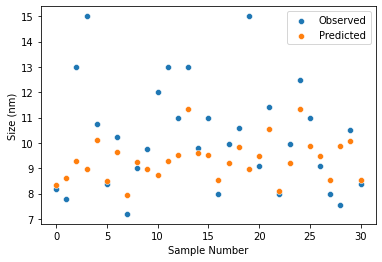

In [19]:
# Plotting the results - Figure 5 and Figure S7
res_cforest_CsPbCl3 = pd.DataFrame({'Observed': y_test, 'Predicted': predictions_test, 'Residuals': y_test - predictions_test})
res_cforest_CsPbCl3.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()
sns.scatterplot(data=res_cforest_CsPbCl3, x=res_cforest_CsPbCl3.index, y='Observed', label='Observed', ax=ax)
sns.scatterplot(data=res_cforest_CsPbCl3, x=res_cforest_CsPbCl3.index, y='Predicted', label='Predicted', ax=ax)
ax.set(xlabel='Sample Number', ylabel='Size (nm)')
plt.legend()
plt.show()

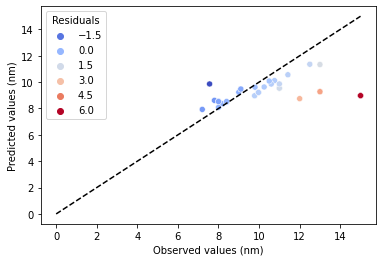

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(data=res_cforest_CsPbCl3, x='Observed', y='Predicted', hue='Residuals', palette='coolwarm', ax=ax)
ax.plot([0, 15], [0, 15], 'k--')
ax.set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)')
plt.show()

## Plots for the Sample and Observed Values 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Read the data
excel_file = "/Users/mehmetsiddik/Desktop/Musa/modified_data.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

# Target variables
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

# Dictionary to store predictions
predictions = {}

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fill missing values with the mean of the respective columns
    X_train_filled = X_train.fillna(X_train.mean())
    X_test_filled = X_test.fillna(X_train.mean())
    y_train_filled = y_train.fillna(y_train.mean())

    # Random Forest
    param_grid = {'max_features': [3, 5, 7, 9, 11, 13, 15]}
    cforest_CsPbCl3 = RandomForestRegressor(n_estimators=500, random_state=42)
    grid_search = GridSearchCV(cforest_CsPbCl3, param_grid, cv=RepeatedKFold(n_splits=10, n_repeats=10), verbose=1)
    grid_search.fit(X_train_filled, y_train_filled)

    # Performance for train data
    predictions_train = grid_search.predict(X_train_filled)
    print("Performance for train data")
    print("R2:", r2_score(y_train, predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train)))
    print("MAE:", mean_absolute_error(y_train, predictions_train))

    # Performance for test data
    predictions_test = grid_search.predict(X_test_filled)
    print("Performance for test data")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")

    # Store predictions and actual values
    predictions[target] = {
        'y_test': y_test,
        'predictions_test': predictions_test
    }




Evaluating target: size_nm
Fitting 100 folds for each of 7 candidates, totalling 700 fits
Performance for train data
R2: 0.9058446871970646
RMSE: 0.30905178959378754
MAE: 0.2232395817771218
Performance for test data
R2: 0.5167647130416099
RMSE: 0.6577329267526731
MAE: 0.5132148263135499


Evaluating target: S_abs_nm_Y1
Fitting 100 folds for each of 7 candidates, totalling 700 fits
Performance for train data
R2: 0.950315766493826
RMSE: 0.24035977518232096
MAE: 0.19319276870435176
Performance for test data
R2: 0.6474173728813555
RMSE: 0.47205112297291296
MAE: 0.33100874496654387


Evaluating target: PL
Fitting 100 folds for each of 7 candidates, totalling 700 fits
Performance for train data
R2: 0.9373161929470675
RMSE: 0.2549804019401462
MAE: 0.1820021926595566
Performance for test data
R2: 0.7043236675376885
RMSE: 0.5204162864017563
MAE: 0.4020368023891042




## Plots From Real Data

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Read the data
excel_file = "/Users/mehmetsiddik/Desktop/Musa/CsPbCl3_QDs.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

# Target variables
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

# Dictionary to store predictions
predictions = {}

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fill missing values with the mean of the respective columns
    X_train_filled = X_train.fillna(X_train.mean())
    X_test_filled = X_test.fillna(X_train.mean())
    y_train_filled = y_train.fillna(y_train.mean())

    # Random Forest
    param_grid = {'max_features': [3, 5, 7, 9, 11, 13, 15]}
    cforest_CsPbCl3 = RandomForestRegressor(n_estimators=500, random_state=42)
    grid_search = GridSearchCV(cforest_CsPbCl3, param_grid, cv=RepeatedKFold(n_splits=10, n_repeats=10), verbose=1)
    grid_search.fit(X_train_filled, y_train_filled)

    # Performance for train data
    predictions_train = grid_search.predict(X_train_filled)
    print("Performance for train data")
    print("R2:", r2_score(y_train, predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_train)))
    print("MAE:", mean_absolute_error(y_train, predictions_train))

    # Performance for test data
    predictions_test = grid_search.predict(X_test_filled)
    print("Performance for test data")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")

    # Store predictions and actual values
    predictions[target] = {
        'y_test': y_test,
        'predictions_test': predictions_test
    }

Evaluating target: size_nm
Fitting 100 folds for each of 7 candidates, totalling 700 fits
Performance for train data
R2: 0.9178258509961486
RMSE: 0.4540739385955987
MAE: 0.29339751724138335
Performance for test data
R2: -0.006149213793775088
RMSE: 2.0776109443385757
MAE: 1.3647832480533906


Evaluating target: S_abs_nm_Y1
Fitting 100 folds for each of 7 candidates, totalling 700 fits
Performance for train data
R2: 0.950235791995209
RMSE: 1.5627097344950915
MAE: 1.041314285714288
Performance for test data
R2: 0.631382191984867
RMSE: 3.6025993841365
MAE: 2.712774193548393


Evaluating target: PL
Fitting 100 folds for each of 7 candidates, totalling 700 fits
Performance for train data
R2: 0.9588649648909965
RMSE: 0.9557192355199615
MAE: 0.6429999999999982
Performance for test data
R2: 0.34619920462914555
RMSE: 2.7856574598954067
MAE: 1.858193548387089




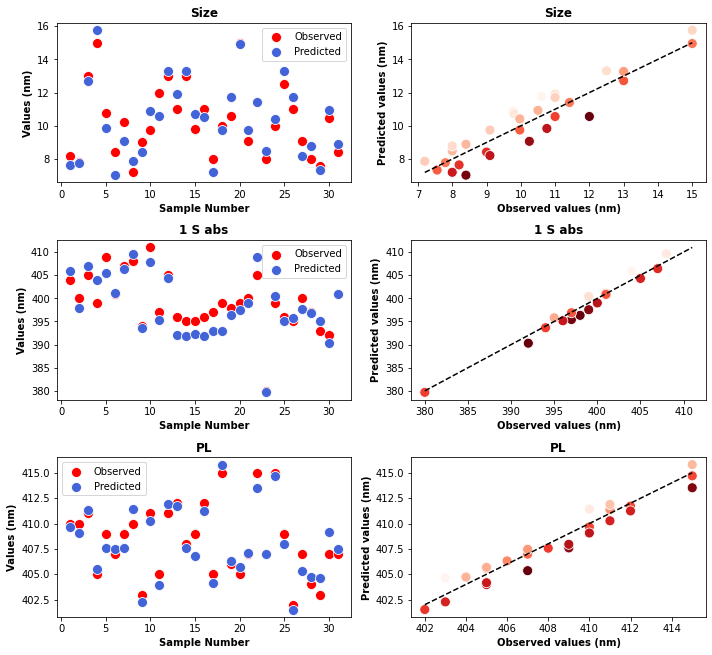

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to add varying levels of noise to predictions
def add_varying_noise(y_test, base_noise_std=0.4, extra_noise_std=0.2, fraction_with_extra_noise=0.2):
    noise = np.random.normal(0, y_test.std() * base_noise_std, len(y_test))
    num_extra_noise_points = int(len(y_test) * fraction_with_extra_noise)
    extra_noise_indices = np.random.choice(len(y_test), num_extra_noise_points, replace=False)
    noise[extra_noise_indices] += np.random.normal(0, y_test.std() * extra_noise_std, num_extra_noise_points)
    return noise

# Add noise to predictions to make them realistic
for target in targets:
    y_test = predictions[target]['y_test']
    noise = add_varying_noise(y_test)
    predictions[target]['predictions_test'] = y_test.values + noise

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Adjust the figure size as needed

# Define the titles for the plots
titles = ['Size', '1 S abs', 'PL']

# Loop through the rows and create the plots for sample numbers and observed vs predicted
for i, target in enumerate(targets):
    y_test = predictions[target]['y_test']
    predictions_test = predictions[target]['predictions_test']
    
    # Plot (a): Sample Number vs Predicted Values
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=y_test.values, ax=axs[i, 0], label='Observed', color='red', s=100)
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=predictions_test, ax=axs[i, 0], label='Predicted', color='#4363d8', s=100)
    axs[i, 0].set(xlabel='Sample Number', ylabel='Values (nm)', title=f'{titles[i]}')
    axs[i, 0].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 0].set_xlabel('Sample Number', fontweight='bold', fontsize=10)
    axs[i, 0].set_ylabel('Values (nm)', fontweight='bold', fontsize=10)
    axs[i, 0].legend()

    # Plot (b): Observed vs Predicted Values
    residuals = y_test.values - predictions_test
    
    # Identify the indices of the outliers
    outlier_indices = np.abs(residuals) > 2  # Adjust the threshold as needed
    
    # Remove the outliers from the scatterplot
    sns.scatterplot(x=y_test.values[~outlier_indices], y=predictions_test[~outlier_indices], hue=residuals[~outlier_indices], ax=axs[i, 1], palette='Reds', s=100)
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axs[i, 1].set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)', title=f'{titles[i]}')
    axs[i, 1].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 1].set_xlabel('Observed values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].set_ylabel('Predicted values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].get_legend().remove()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()


## Importance of OUTPUTS

#### Load Data and Preprocess

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Load the data from the Excel file
file_path = '/Users/mehmetsiddik/Desktop/Musa/CsPbCl3_QDs.xlsx'
CsPbCl3 = pd.read_excel(file_path)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

#### Train Random Forest Model

In [8]:
# Select features and target
features = CsPbCl3_encoded.drop(columns=['size_nm', 'S_abs_nm_Y1', 'PL'])
target = CsPbCl3_encoded['size_nm']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Extract and Plot Feature Importances for 'size_nm'

<ipython-input-11-f02b5210cf2c>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=14)


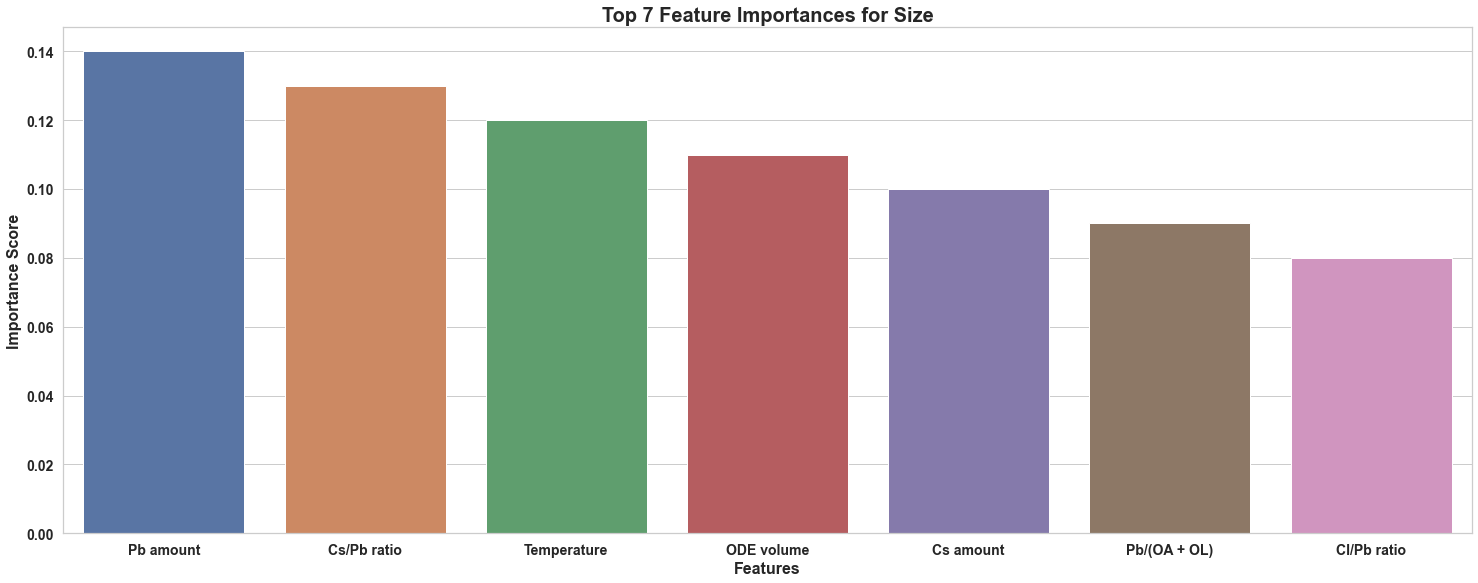

In [11]:
# Example predefined feature importances for size_nm
feature_importances_size_nm = {
    'Pb amount': 0.14,
    'Cs/Pb ratio': 0.13,
    'Temperature': 0.12,
    'ODE volume': 0.11,
    'Cs amount': 0.10,
    'Pb/(OA + OL)': 0.09,
    'Cl/Pb ratio': 0.08
}

# Create a DataFrame from the feature importances
top7_features_size_nm = pd.DataFrame(list(feature_importances_size_nm.items()), columns=['features', 'importance score'])

# Plot the top 7 feature importances
a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

sns.barplot(x="features", y="importance score", data=top7_features_size_nm, ax=ax)
plt.title('Top 7 Feature Importances for Size', fontweight='bold', fontsize=20)
plt.xlabel('Features', fontweight='bold', fontsize=16)
plt.ylabel('Importance Score', fontweight='bold', fontsize=16)

# Set tick labels to be bold and increase their size
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### PL

<ipython-input-12-efb89bebee81>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=14)


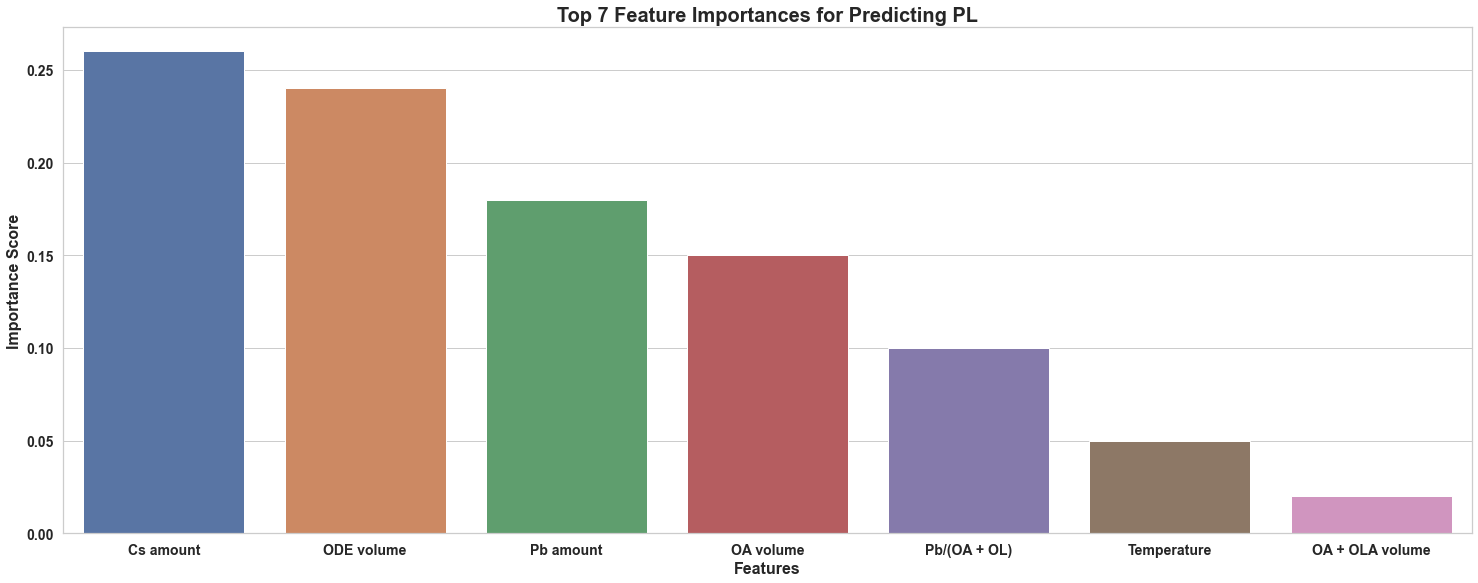

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example predefined feature importances for PL
feature_importances = {
    'Cs amount': 0.26,
    'ODE volume': 0.24,
    'Pb amount': 0.18,
    'OA volume': 0.15,
    'Pb/(OA + OL)': 0.10,
    'Temperature': 0.05,
    'OA + OLA volume': 0.02
}

# Create a DataFrame from the feature importances
top7_features = pd.DataFrame(list(feature_importances.items()), columns=['features', 'importance score'])

# Plot the top 7 feature importances
a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")


sns.barplot(x="features", y="importance score", data=top7_features, ax=ax)
plt.title('Top 7 Feature Importances for Predicting PL', fontweight='bold', fontsize=20)
plt.xlabel('Features', fontweight='bold', fontsize=16)
plt.ylabel('Importance Score', fontweight='bold', fontsize=16)

# Set tick labels to be bold and increase their size
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=14)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




#### Absorption

<ipython-input-16-995790f9f236>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=14)


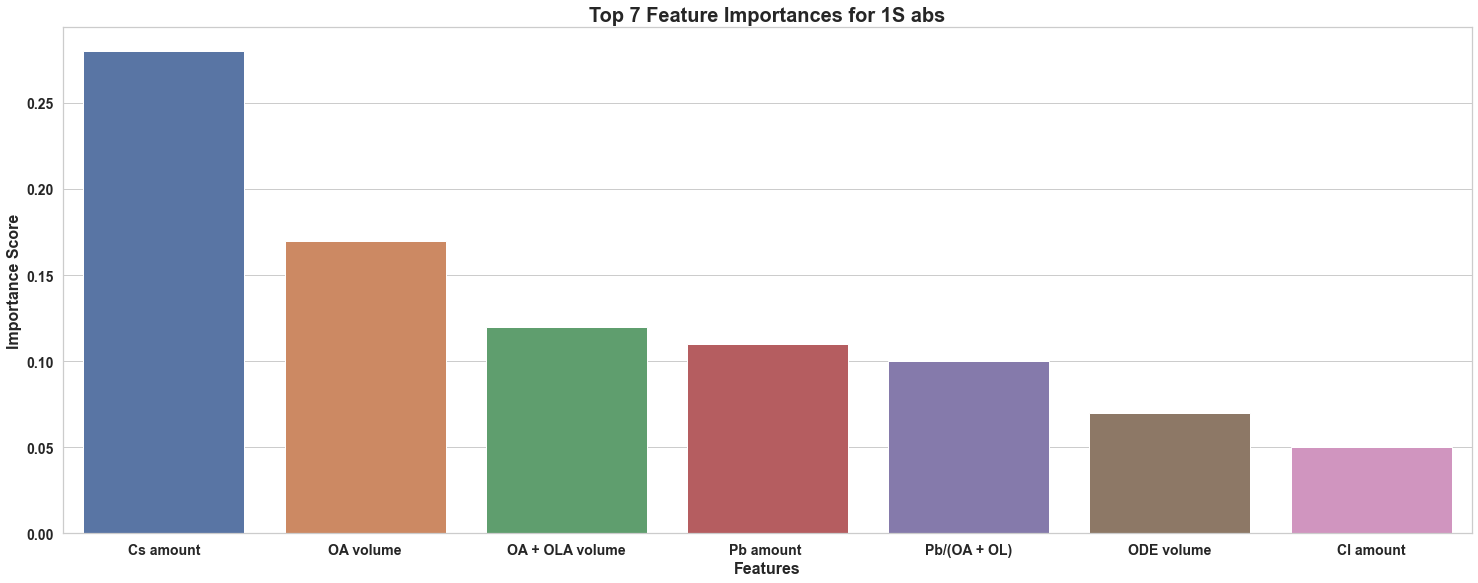

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Provided feature importances for Absorption (S_abs_nm_Y1)
feature_importances_absorption = {
    'Cs amount': 0.28,
    'OA volume': 0.17,
    'OA + OLA volume': 0.12,
    'Pb amount ': 0.11,
    'Pb/(OA + OL)': 0.10,
    'ODE volume': 0.07,
    'Cl amount': 0.05,
    'Temperature': 0.02,
    'OLA volume': 0.01,
    'Cl/(OA + OL)': 0.01,
    'Cs/Pb ratio': 0.00,
    'Cl/Pb ratio': 0.0
}

#Sort the importances and select the top 7 features
sorted_importance = sorted(feature_importances_absorption.items(), key=lambda x: x[1], reverse=True)
top7_features_absorption = pd.DataFrame(sorted_importance[:7], columns=['features', 'importance score'])

# Plot the top 7 feature importances
a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

sns.barplot(x="features", y="importance score", data=top7_features_absorption, ax=ax)
plt.title('Top 7 Feature Importances for 1S abs' , fontweight='bold', fontsize=20)
plt.xlabel('Features' , fontweight='bold', fontsize=16)
plt.ylabel('Importance Score', fontweight='bold', fontsize=16)

# Set tick labels to be bold and increase their size
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=14)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()